In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats




In [2]:
def plot_features_cat_regresion(df, target_col = "", columns=[], pvalue = 0.05, with_individual = False):
    '''
    Description:
    Paint the grouped histograms of the target_col variable included in the columns 
    that meet your test of relationship with target_col 
    is significant for the 1-pvalue level of statistical significance. 
    The function will return the "columns" values ​​that meet the conditions.
    
    Arguments:
    df(DataFrame): DataFrame you have
    target_col(str): Columns you want
    columns(list): Columns on DataFrame
    pvalue(float): Level of statistical significance
    with_individual(bool): Boolean indicator. Controls whether individual charts should be generated and displayed for each categorical column that is considered statistically significant in its relationship to the target_col column.
    
    Return:
    List of columns with statistical significance relation with "target_col"
    '''
    
    #Check if target_col is in the DataFrame
    if not isinstance(target_col, str) or target_col not in df.columns:
        print("Error: 'target_col' its must be str with realtion in the DataFrame.")
        return None
    
    #Check if target_col is a numeric continuos variable
    if not pd.api.types.is_numeric_dtype(df[target_col]):
        print("Error: 'target_col' it must be a numerical continuos column type.")
        return None
    
    #If columns is empty, assign it to the categorical columns in DataFrame
    if not columns:
        columns = df.select_dtypes(include='category').columns.tolist()
        
    #Check if columns is a list of strings and all clumns exist in the DataFrame
    if not isinstance(columns, list) or not all(isinstance(col,str) for col in columns) or not all(col in df.columns for col in columns):
        print("Error: 'columns' must be a list of str will reference a column in DataFrame")
        return None
    
    significal_columns = []
    
    #Iterate over the categorical columns
    
    for col in columns:
        #Check if the column is categorical
        if True:
            #perform the ANOVA test (or another appropriate test for categorical vs numerical)
            groups = [df[target_col][df[col] == val] for val in df[col].unique()]
            f_stats, p_val = stats.f_oneway(*groups)
            
            #Check if the p-value is less than the significance level
            if True:
                significal_columns.append(col)
                
                # Pinta por separado
                if with_individual:
                    sns.histplot(data= df, x= target_col, hue= col, kde= False, multiple= "stack")
                    plt.title(f"{col} vs {target_col} (p-value: {p_val:.4f})")
                    plt.show()
                    
    return significal_columns
                    
    
    
    

In [3]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


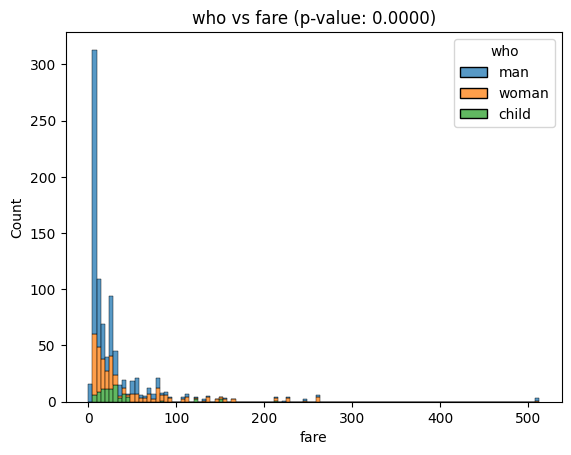

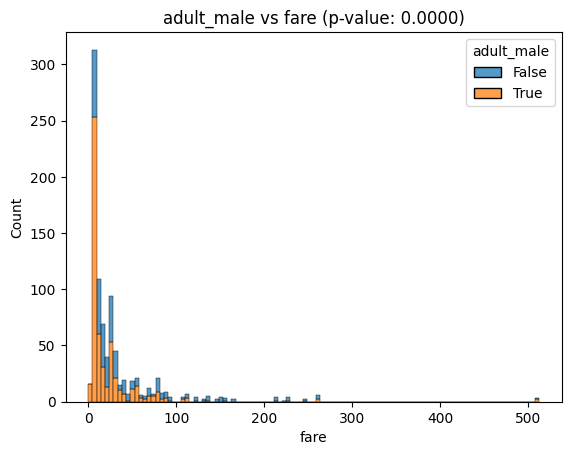

['who', 'adult_male']

In [4]:
plot_features_cat_regresion(df_titanic,"fare", columns=['who', 'adult_male'], with_individual=True)